#  Exercise: Comparing Validation Techniques in Machine Learning

This notebook demonstrates how different **model validation techniques** affect model performance and reliability.

We will compare:
- **Train-Test Split**
- **Train-Validate-Test**
- **K-Fold Cross-Validation**
- **Stratified K-Fold Cross-Validation**

Dataset: **Breast Cancer (Scikit-learn)**

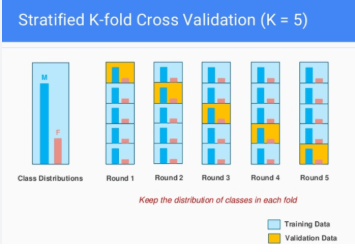

In [1]:
#  Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load the Dataset

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
print('Shape of data:', X.shape)
print('Target classes:', np.unique(y))

Shape of data: (569, 30)
Target classes: [0 1]


## 2️⃣ Create the Model

In [5]:
model = LogisticRegression(max_iter=10000)

## 3️⃣ Train-Test Split Validation

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_split = accuracy_score(y_test, y_pred)
print(f'Train-Test Split Accuracy: {acc_split:.4f}')

Train-Test Split Accuracy: 0.9766


In [7]:
# train-validate-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)
acc_val = accuracy_score(y_val, y_pred_val)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Validation Accuracy: {acc_val:.4f}')
print(f'Test Accuracy: {acc_test:.4f}')

Validation Accuracy: 0.9250
Test Accuracy: 0.9649


## 4️⃣ K-Fold Cross-Validation

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_kfold = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print('K-Fold Accuracy Scores:', acc_kfold)
print(f'K-Fold Mean Accuracy: {acc_kfold.mean():.4f}')

K-Fold Accuracy Scores: [0.95614035 0.96491228 0.93859649 0.97368421 0.92035398]
K-Fold Mean Accuracy: 0.9507


## 5️⃣ Stratified K-Fold Cross-Validation

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_stratified = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print('Stratified K-Fold Accuracy Scores:', acc_stratified)
print(f'Stratified K-Fold Mean Accuracy: {acc_stratified.mean():.4f}')

Stratified K-Fold Accuracy Scores: [0.96491228 0.92105263 0.96491228 0.94736842 0.97345133]
Stratified K-Fold Mean Accuracy: 0.9543


## 6️⃣ Compare Results Visually

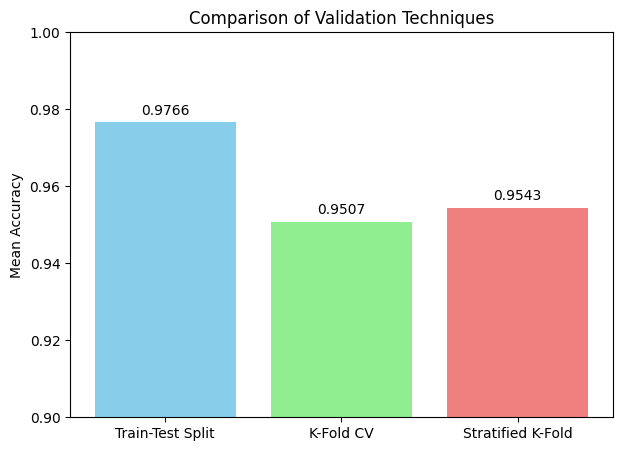

In [10]:
methods = ['Train-Test Split', 'K-Fold CV', 'Stratified K-Fold']
scores = [acc_split, acc_kfold.mean(), acc_stratified.mean()]

plt.figure(figsize=(7,5))
plt.bar(methods, scores, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Validation Techniques')
plt.ylabel('Mean Accuracy')
plt.ylim(0.9, 1.0)
for i, score in enumerate(scores):
    plt.text(i, score + 0.002, f'{score:.4f}', ha='center')
plt.show()

## 💬 Discussion Questions

1. Why does K-Fold CV generally produce more stable results than a single train-test split?
2. What problem does Stratified K-Fold solve when working with imbalanced datasets?
3. How would results differ if we increased the number of folds from 5 to 10?
4. What are the trade-offs between computation time and accuracy when using cross-validation?